# (1) Process Butterfly Data

In [1]:
from utils.data import create_butterfly_dataset
trainset, testset, normal_mapping, reverse_mapping = create_butterfly_dataset()
assert len(trainset) == 12594, 'Size of train set not match'
assert len(testset) == 500, 'Size of test set not match'

# (2) Import Classifier

In [2]:
from model.butterfly_classifier import DenseNet121
import torch

model = DenseNet121(num_classes=len(normal_mapping)).to('cuda')
model.load_state_dict(torch.load('./model/states/butterfly_classifier.pth'))

<All keys matched successfully>

# (3) Evaluate AAA against untargeted adversarial examples

In [3]:
from algo.attacker import adversarial_generator

test_img, test_label = testset[5]
test_img = test_img.unsqueeze(0)

# adv_img = adversarial_generator(model = model, target_class=test_label,
#                              image=test_img, 
#                              search_var=1e-3,
#                              sample_num=50,
#                              bound=0.1,
#                              lr=0.01,
#                              query_limit=3000)

In [4]:
adv_img = torch.load('test_example.ph')
adv_img

tensor([[[[0.3051, 0.3655, 0.4233,  ..., 0.7484, 0.6424, 0.6302],
          [0.4008, 0.3333, 0.2355,  ..., 0.6627, 0.7106, 0.5984],
          [0.4343, 0.2690, 0.4094,  ..., 0.6714, 0.7231, 0.5510],
          ...,
          [0.5812, 0.5573, 0.4655,  ..., 0.5525, 0.4176, 0.3749],
          [0.5890, 0.6090, 0.4412,  ..., 0.5204, 0.4933, 0.4445],
          [0.5212, 0.5851, 0.6112,  ..., 0.5965, 0.4573, 0.5102]],

         [[0.4031, 0.4635, 0.5214,  ..., 0.7445, 0.6384, 0.6263],
          [0.4910, 0.4275, 0.3257,  ..., 0.6510, 0.6988, 0.5867],
          [0.5127, 0.3514, 0.4996,  ..., 0.6596, 0.7114, 0.5431],
          ...,
          [0.6282, 0.6043, 0.5125,  ..., 0.5918, 0.4647, 0.4259],
          [0.6204, 0.6443, 0.4765,  ..., 0.5557, 0.5404, 0.4994],
          [0.5525, 0.6165, 0.6465,  ..., 0.6318, 0.5043, 0.5651]],

         [[0.0776, 0.1341, 0.1959,  ..., 0.7249, 0.6227, 0.6106],
          [0.2086, 0.1216, 0.0120,  ..., 0.6314, 0.6792, 0.5592],
          [0.2735, 0.0808, 0.1859,  ..., 0

In [5]:
from algo.defender import AAA
from torch import nn

org_logits = model(test_img.to('cuda'))

In [6]:
from algo.defender import AAA
from torch import nn
import numpy as np
import torch.nn.functional as F


u = AAA(z=org_logits, y=torch.tensor(test_label).view(1).to('cuda'), L=nn.CrossEntropyLoss(), alpha=0.7, tau=6, kappa=100, T=7, beta=5, lr=0.1, AAA_type='sin')
u

tensor([[-0.8702, -1.3314, -1.0732, -1.4890, -1.3965, -2.0489, -1.0501, -2.3023,
         -1.3231, -1.9815, -1.3905, -0.7753, -1.2940, -0.3077, -1.7350, -1.0806,
         -1.9105, -1.0142, -1.1491, -1.7636, -1.4645, -1.3727, -1.0370, -0.6123,
         -1.5878, -1.5981, -1.0625, -1.2141, -0.8046, -1.6288, -1.1163, -1.9332,
         -0.5480, -0.9889, -1.6420, -0.6694, -1.3323, -1.5374, -1.5143, -1.5142,
         -1.8544, -0.2847, -2.3223, -1.5522, -1.5812, -1.2780, -0.9587, -1.4446,
         -0.6784, -1.2855, -1.7000,  1.0820, -0.4786, -1.0661, -1.8405, -1.6975,
         -1.4524, -2.0595, -1.8695, -1.2042, -1.4447, -0.6109, -1.1339, -1.1762,
         -1.3389, -1.4364, -2.2401, -1.2881, -1.0704, -0.3559, -0.4827, -1.4373,
         -1.5044, -1.1645, -0.6834, -2.3486, -2.7447, -0.9168, -1.7979, -1.6201,
         -2.2794, -1.6179, -1.7007, -1.0451, -1.3559, -2.1354, -1.4272, -1.8748,
         -0.5936, -0.9251, -1.0504, -1.2027, -0.7437, -1.0753, -1.8815, -2.3734,
         -1.4959, -1.1798, -

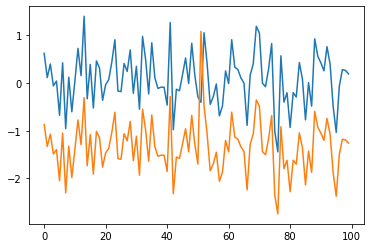

In [7]:
import matplotlib.pyplot as plt
plt.plot(org_logits.view(-1).detach().cpu().numpy())
plt.plot(u.view(-1).detach().cpu().numpy())
# org_logits